In [1]:
# import all the required dependecnies and modules

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import time
import pickle
from google.cloud import bigquery
from google.oauth2 import service_account
# from google.cloud import bigquery_storage_v1
import string
import xgboost as xgb
import importlib
import utility as ut
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")
import export_dataset as ed
import define_X_y as xy
import pre_processing as pp
import feature_engineering as fe
import feature_selection as fs
import model_training as mt
import model_evaluation as me
import lift_and_ks as ks

In [2]:
gcp_cred_json = 'ascendant-epoch-432900-m8-e97fb3b60497.json'
project_id = "ascendant-epoch-432900-m8"
dataset_id = "prop_model"
table_id = "new_churn"
input_query = """
    SELECT
      *
    FROM
      `ascendant-epoch-432900-m8.prop_model.new_churn`
    
"""

In [3]:
df = ed.export_dataset(gcp_cred_json, project_id, dataset_id, table_id, input_query)

DataFrame shape: (5000, 22)


,int64_field_0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn,ID
0,919,NJ,53,area_code_408,False,False,0,228.6,117,38.86,...,11.29,227.2,124,10.22,10.1,2,2.73,9,1,1919
1,988,KS,116,area_code_408,True,False,0,232.2,98,39.47,...,20.80,151.3,69,6.81,10.6,1,2.86,7,1,1988
2,2011,MI,146,area_code_408,False,False,0,149.3,83,25.38,...,15.90,149.8,100,6.74,7.9,4,2.13,7,1,3011
3,2090,HI,99,area_code_408,False,False,0,135.7,107,23.07,...,17.71,209.0,95,9.40,8.8,3,2.38,7,1,3090
4,2817,NH,103,area_code_408,False,False,0,150.6,125,25.60,...,14.37,221.2,104,9.95,10.4,8,2.81,8,1,3817


None


In [4]:
print(display(df.head()))

,int64_field_0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn,ID
0,919,NJ,53,area_code_408,False,False,0,228.6,117,38.86,...,11.29,227.2,124,10.22,10.1,2,2.73,9,1,1919
1,988,KS,116,area_code_408,True,False,0,232.2,98,39.47,...,20.80,151.3,69,6.81,10.6,1,2.86,7,1,1988
2,2011,MI,146,area_code_408,False,False,0,149.3,83,25.38,...,15.90,149.8,100,6.74,7.9,4,2.13,7,1,3011
3,2090,HI,99,area_code_408,False,False,0,135.7,107,23.07,...,17.71,209.0,95,9.40,8.8,3,2.38,7,1,3090
4,2817,NH,103,area_code_408,False,False,0,150.6,125,25.60,...,14.37,221.2,104,9.95,10.4,8,2.81,8,1,3817


None


In [5]:
not_use = ['customerID', 'Churn']
id = ['ID']
target = ['Churn']

In [6]:
importlib.reload(pp)
cat_col, num_col, X, y  = xy.X_y_columns(df, not_use, id, target)

Total customers:  5000
churners:  598
churn rate rate %:  11.96
total cat cols:  2
total num cols:  19
Cat Columns descriptions
--------------------------------------------------
Column: state
Number of unique values: 51
Unique values: ['NJ' 'KS' 'MI' 'HI' 'NH' 'KY' 'VT' 'AL' 'AR' 'OH' 'GA' 'WV' 'MN' 'SC'
 'FL' 'MD' 'IN' 'RI' 'ME' 'CT' 'OK' 'VA' 'OR' 'WY' 'WI' 'NM' 'DC' 'MA'
 'SD' 'PA' 'WA' 'CA' 'NY' 'CO' 'AZ' 'NC' 'ID' 'DE' 'IA' 'LA' 'AK' 'TN'
 'MT' 'IL' 'MS' 'NV' 'NE' 'TX' 'MO' 'UT' 'ND']
Value counts:
state
WV    158
MN    125
AL    124
ID    119
VA    118
TX    116
OH    116
WY    115
OR    114
NY    114
NJ    112
UT    112
WI    106
MA    103
ME    103
MI    103
MD    102
VT    101
KS     99
MS     99
KY     99
RI     99
CT     99
MT     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NC     91
NM     91
SC     91
OK     90
NV     90
FL     90
TN     89
AZ     89
NE     88
IL     88
ND     88
DC     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK  

In [7]:
X_PP = pp.pre_processing(X, cat_col, num_col)

**************************************************
Pre-Processing: SimpleImputer
**************************************************
**************************************************
Pre-Processing: SimpleImputer
**************************************************
**************************************************
Feature Engineering: Remove_ConstantFeatures
**************************************************
- It will remove features with 1 unique value(s).

[] []
0 features with 1 or fewer unique value(s)
(5000, 21)


In [8]:
X_FE = fe.feature_engineering(X_PP, y)

**************************************************
Feature Engineering: OHE Encoding for categorical features
**************************************************
Before OHE encoding: (5000, 21)
(5000, 30)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_FE, y, test_size=0.25, stratify = y, random_state=24)

print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)

print('X_test shape  : ', X_test.shape)
print('y_test shape  : ', y_test.shape)

print('Disconnects in y_test : ', y_test.sum())

X_train shape :  (3750, 30)
y_train shape :  (3750,)
X_test shape  :  (1250, 30)
y_test shape  :  (1250,)
Disconnects in y_test :  149


In [10]:
# Converting all columns to float type, for compatibility with XGBoost
for i in X_train:
    X_train[i] = X_train[i].astype('float')
for i in X_test:
    X_test[i] = X_test[i].astype('float')
# for i in X_PP_woe:
#     X_PP_woe[i] = X_PP_woe[i].astype('float')

In [11]:
# Calculate the ratio of negative class to positive class
ratio = float(y_train.value_counts()[0] / y_train.value_counts()[1])
ratio

7.351893095768374

**************************************************
get best hyper parameters

time_spend: 15.51092267036438


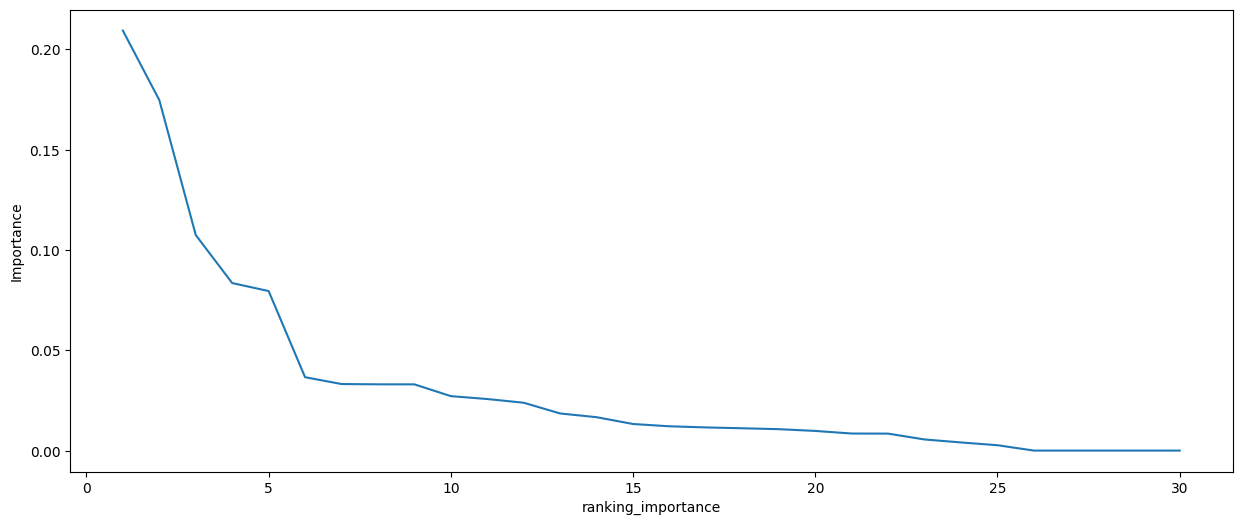

                          feature  Importance  ranking_importance
4   number_customer_service_calls    0.209392                   1
3              international_plan    0.174741                   2
7                total_day_charge    0.107474                   3
2                   int64_field_0    0.083519                   4
8               total_day_minutes    0.079530                   5
18                voice_mail_plan    0.036579                   6
12               total_intl_calls    0.033177                   7
5           number_vmail_messages    0.033030                   8
14             total_intl_minutes    0.033014                   9
0                              ID    0.027141                  10
11              total_eve_minutes    0.025699                  11
10               total_eve_charge    0.023851                  12
26                       state_VA    0.018503                  13
17            total_night_minutes    0.016643                  14
19        

,feature,Importance,ranking_importance,Importance_cumsum
4,number_customer_service_calls,0.209392,1,0.209392
3,international_plan,0.174741,2,0.384132
7,total_day_charge,0.107474,3,0.491606
2,int64_field_0,0.083519,4,0.575125
8,total_day_minutes,0.079530,5,0.654655


In [12]:
importlib.reload(pp)
best_features = fs.feature_selection(X_train, y_train,  ratio, importance_threshold = 0.70)

In [13]:
ratio = float(y_train.value_counts()[0] / y_train.value_counts()[1])
ratio

7.351893095768374

In [14]:
importlib.reload(pp)
best_model = mt.model_training(ratio, best_features, X_train, y_train)

**************************************************
get best hyper parameters

time_spend: 10.712841749191284


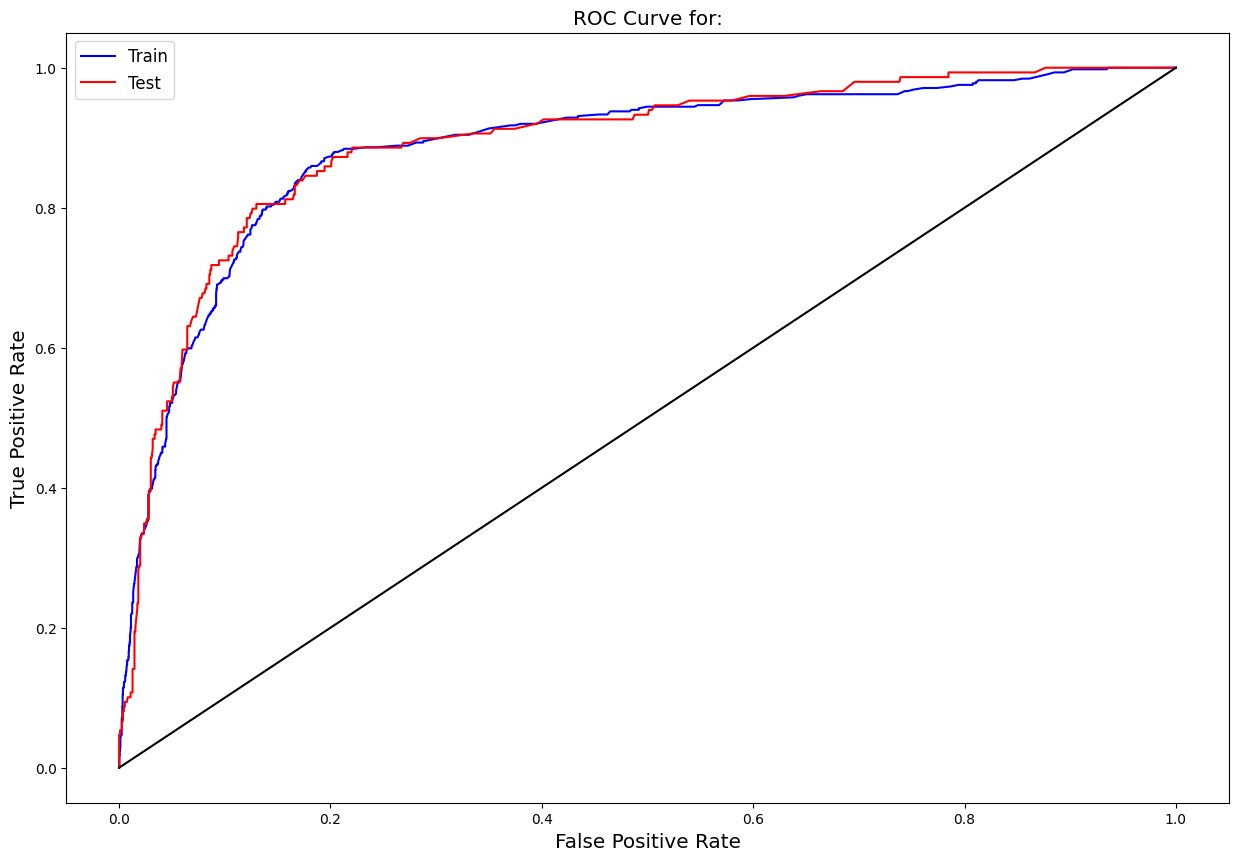

           Training down_sample  Training   Testing
Accuracy               0.848000  0.848000  0.855200
Recall                 0.804009  0.804009  0.805369
Precision              0.428233  0.428233  0.441176
F1-Score               0.558824  0.558824  0.570071
0.8911849508378594


<Figure size 640x480 with 0 Axes>

In [15]:
metrics_summary, y_test_pred, y_test_proba, y_train_proba,y_proba,y_pred, auc = me.model_evaluation(best_model, best_features, X_train, y_train, X_test, y_test, X_FE, y)

In [16]:
auc

0.8911849508378594

In [18]:
## Build final data
df_predict_actual                   = pd.DataFrame()
df_predict_actual['predict']        = y_pred
df_predict_actual['predict_prob']   = y_proba
df_predict_actual['customerID']         = df['ID']

df_predict_actual.head()

,predict,predict_prob,customerID
0,1,0.792515,1919
1,1,0.900414,1988
2,1,0.695782,3011
3,1,0.708029,3090
4,1,0.693704,3817


In [19]:
df_fixed    = df_predict_actual.sort_values(by = 'predict_prob', ascending = False).reset_index()
sample_size = df_predict_actual.shape[0]

# Segment the data into Decile size of 1
decile_size = sample_size/100 
df_fixed['Rank'] = ((df_predict_actual.index//decile_size)*1+1).astype('int64')

# df_fixed2 = df_fixed[df_fixed['Rank'] <= 20][['chc_id', 'Rank']]
df_fixed2 = df_fixed[['customerID', 'Rank']]
df_fixed2.head()

,customerID,Rank
0,1180,1
1,2328,1
2,3652,1
3,2917,1
4,1443,1


In [20]:
test_df = pd.concat([X_test[best_features], y_test], axis = 1)
test_df['Churn_probability'] = y_test_proba
test_df['y_pred'] = y_test_pred

In [21]:
test_df.Churn.value_counts()

Churn
0    1101
1     149
Name: count, dtype: Int64

In [22]:
importlib.reload(pp)
ks_df = ut.ks(data=test_df,target="Churn", prob= "Churn_probability")
ks_df

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.661641,0.976250,76,48,51.01%,4.36%,51.01%,4.36%,0.46647
2,0.536102,0.661611,41,85,27.52%,7.72%,78.52%,12.08%,0.664436
3,0.402869,0.535957,15,110,10.07%,9.99%,88.59%,22.07%,0.665198
4,0.376086,0.402556,2,90,1.34%,8.17%,89.93%,30.25%,0.596877
5,0.357040,0.375167,4,119,2.68%,10.81%,92.62%,41.05%,0.515639
6,0.315883,0.356244,4,153,2.68%,13.90%,95.30%,54.95%,0.40352
7,0.296036,0.315464,2,126,1.34%,11.44%,96.64%,66.39%,0.302501
8,0.261527,0.293997,3,113,2.01%,10.26%,98.66%,76.66%,0.220001
9,0.198985,0.261495,2,131,1.34%,11.90%,100.00%,88.56%,0.114441
